# Deep Failure Analysis Notebook
# ==============================
### Comprehensive analysis of why 52 charts weren't perturbed and 
### 952 perturbations weren't evaluated.

# # Deep Failure Analysis: Understanding GPT-4V Extraction Failures
# 
### This notebook provides a step-by-step analysis of:
### 1. Why 52 out of 200 charts were not perturbed
### 2. Why 952 out of 1,650 perturbations were excluded from evaluation
# 
### **Key Questions:**
### - Which chart types are most vulnerable?
### - What perturbations cause the most failures?
### - Are there patterns in the failures?


### 1. Setup and Data Loading


In [1]:
import json
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create output directory for figures
figures_path = "data/failure_analysis_figures/"
os.makedirs(figures_path, exist_ok=True)

print(" Libraries imported successfully")

# %%
# Load all necessary data files
base_path = "E:/langchain/Dissertation/data/analysis_cache/"

# Load extraction results
with open(os.path.join(base_path, "complete_extraction_results.json"), 'r') as f:
    extractions = json.load(f)

# Load robustness analysis
robustness_df = pd.read_csv(os.path.join(base_path, "robustness_analysis_corrected.csv"))

# Load failure evidence CSVs
charts_not_perturbed = pd.read_csv("charts_not_perturbed_EVIDENCE.csv")
excluded_perturbations = pd.read_csv("excluded_perturbations_EVIDENCE.csv")

print(f" Loaded {len(extractions)} extraction results")
print(f" Loaded {len(charts_not_perturbed)} charts not perturbed")
print(f" Loaded {len(excluded_perturbations)} excluded perturbations")
print(f" Loaded {len(robustness_df)} robustness evaluations")


 Libraries imported successfully
 Loaded 898 extraction results
 Loaded 52 charts not perturbed
 Loaded 952 excluded perturbations
 Loaded 698 robustness evaluations


### 2. Overview of Failures

EXTRACTION SUCCESS RATES:
       Category  Total  Successful  Failed Success Rate
Original Charts    200         148      52        74.0%
  Perturbations   1650         698     952        42.3%


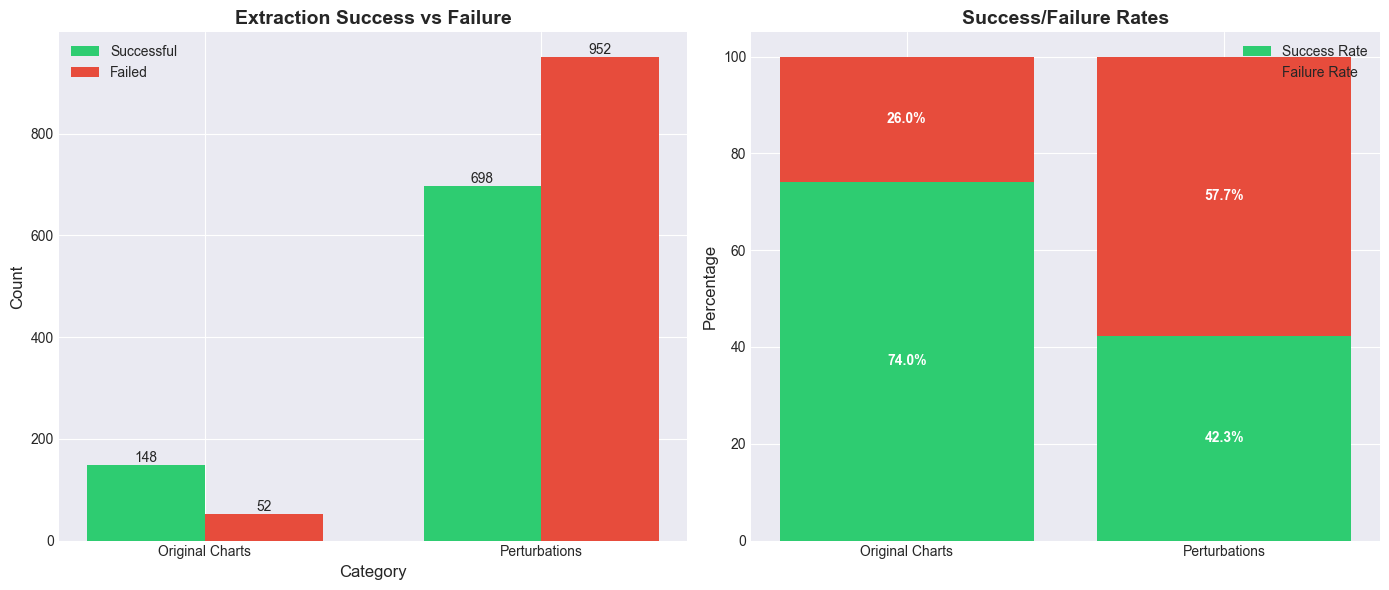

In [2]:
# Calculate overall statistics
total_charts = 200
charts_perturbed = total_charts - len(charts_not_perturbed)
total_perturbations = 1650
perturbations_evaluated = len(robustness_df)
perturbations_excluded = len(excluded_perturbations)

# Create overview dataframe
overview_df = pd.DataFrame({
    'Category': ['Original Charts', 'Perturbations'],
    'Total': [total_charts, total_perturbations],
    'Successful': [charts_perturbed, perturbations_evaluated],
    'Failed': [len(charts_not_perturbed), perturbations_excluded],
    'Success Rate': [
        f"{(charts_perturbed/total_charts)*100:.1f}%",
        f"{(perturbations_evaluated/total_perturbations)*100:.1f}%"
    ]
})

print("EXTRACTION SUCCESS RATES:")
print(overview_df.to_string(index=False))

# %%
# Visualize overview
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Success vs Failure counts
categories = ['Original Charts', 'Perturbations']
success_counts = [charts_perturbed, perturbations_evaluated]
failure_counts = [len(charts_not_perturbed), perturbations_excluded]

x = np.arange(len(categories))
width = 0.35

bars1 = ax1.bar(x - width/2, success_counts, width, label='Successful', color='#2ecc71')
bars2 = ax1.bar(x + width/2, failure_counts, width, label='Failed', color='#e74c3c')

ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Extraction Success vs Failure', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')

# Chart 2: Success rates
success_rates = [(charts_perturbed/total_charts)*100, 
                 (perturbations_evaluated/total_perturbations)*100]
failure_rates = [100 - sr for sr in success_rates]

ax2.bar(categories, success_rates, color='#2ecc71', label='Success Rate')
ax2.bar(categories, failure_rates, bottom=success_rates, color='#e74c3c', label='Failure Rate')

ax2.set_ylabel('Percentage', fontsize=12)
ax2.set_title('Success/Failure Rates', fontsize=14, fontweight='bold')
ax2.legend()

# Add percentage labels
for i, (success, failure) in enumerate(zip(success_rates, failure_rates)):
    ax2.text(i, success/2, f'{success:.1f}%', ha='center', va='center', color='white', fontweight='bold')
    ax2.text(i, success + failure/2, f'{failure:.1f}%', ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{figures_path}overview_statistics.png", dpi=300, bbox_inches='tight')
plt.show()